In [1]:
from gplearn.genetic import SymbolicRegressor
from sklearn.utils.random import check_random_state
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [ ]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

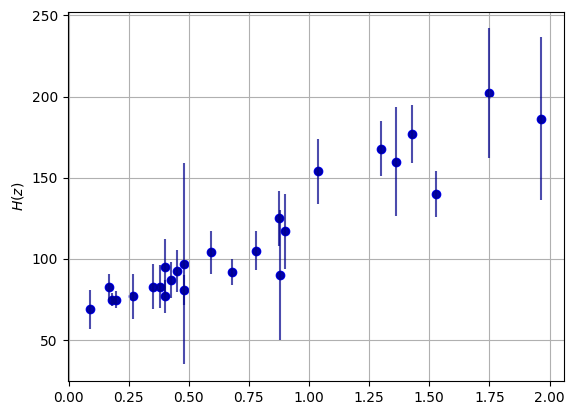

In [9]:
# Training samples - reshape to 2D array
X_train = z_obs.reshape(-1, 1)  # Convert to (n_samples, n_features)
y_train = hub_obs


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train, color='blue')
ax.errorbar(z_obs, hub_obs, yerr=error_obs, fmt='o', markersize=5, color='darkblue', alpha=0.7, label='CC Data')
plt.ylabel('$H(z)$')
plt.grid(True)
plt.show()


In [ ]:
# Create and fit symbolic regressor
est_gp = SymbolicRegressor(population_size=500,
                         generations=30,
                         stopping_criteria=0.01,
                         p_crossover=0.7,
                         p_subtree_mutation=0.1,
                         p_hoist_mutation=0.05,
                         p_point_mutation=0.1,
                         max_samples=0.9,
                         verbose=1,
                         parsimony_coefficient=0.01,
                         random_state=0,
                         function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'sin', 'cos'))  # Added basic functions


est_gp.fit(X_train, y_train)
    
    # Print the best program
print("\nBest program:")
print(est_gp._program)
    
    

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.46          113.266       29          100.134          146.655      5.31s
   1    13.39          110.597       28          31.8332          42.7427      5.14s
   2    18.24          421.129       25          28.3882          43.9268      5.46s
   3    16.52          96.2298       13          16.3377          15.5232      5.08s
   4    16.22          203.948       13          13.7063          35.6971      4.89s
   5    15.25          882.543       11          13.1569          32.8576      4.85s
   6    13.85             1517       22           8.2814          20.6122      4.74s
   7    15.22          2052.01       22          8.86486          15.8548      5.09s
   8    17.46          625.024       22          7.44414          23.3151  

In [19]:
# LCDM Case
def Hub_lcdm(z,Om=0.3,Om_de=0.7):
    h = 70*np.sqrt(Om*(1+z)**3 + Om_de )
    return h 

    # Make predictions
z_range = np.linspace(min(z_obs), max(z_obs), 100).reshape(-1, 1)
y_pred = est_gp.predict(z_range)

Hub = Hub_lcdm(z_range)

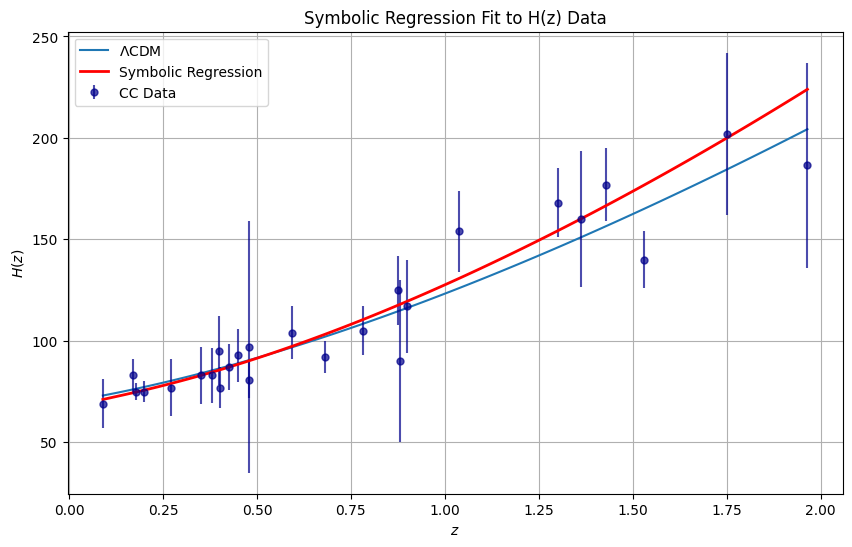

In [ ]:
# Plot results
'''
For high redshifts (>0.75) the solutions are diffents

'''
plt.figure(figsize=(10, 6))
plt.plot(z_range,Hub,label='$\\Lambda$CDM')
plt.errorbar(z_obs, hub_obs, yerr=error_obs, fmt='o', markersize=5, color='darkblue', alpha=0.7, label='CC Data')
plt.plot(z_range, y_pred, color='red', linewidth=2, label='Symbolic Regression')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.title('Symbolic Regression Fit to H(z) Data')
plt.legend()
plt.grid(True)
plt.show()